In [38]:
import json
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import copy

In [39]:
with open("SavedFeatures/final_feature_vector.json", 'r') as f:
    XY = json.load(f)

In [76]:
XY[0]

{'feature': [272987802,
  5,
  156523313.91325694,
  141,
  169388692.13589364,
  1572,
  194897714,
  256472364562,
  123980.73409669212,
  163150359.13613233,
  255502542.74965325,
  1125,
  164617671,
  267702775337,
  146326.81866666666,
  237958022.52177778,
  205304741.40341514,
  749,
  114081168,
  133088008479,
  152311.305740988,
  177687594.76502,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  44,
  7794407,
  8133149373,
  177145.61363636365,
  6.538636363636363,
  184844303.9318182,
  25,
  6007348,
  4019723303,
  240293.92,
  6.700000000000001,
  160788932.12,
  32,
  7969802,
  5994332869,
  249056.3125,
  6.671875,
  187322902.15625,
  15,
  868793,
  1303244588,
  57919.53333333333,
  6.2733333333333325,
  86882972.53333333,
  21,
  3766023,
  4144349048,
  179334.42857142858,
  6.7714285714285705,
  197349954.66666666,
  5,
  526940,
  600864824,
  105388.0,
  5.9799999999999995,
  120172964.8,
  3,
  2107430,
  2552147626

In [77]:
XY[1]

{'feature': [190053769,
  11,
  130818934.29671897,
  130,
  169388692.13589364,
  1769,
  218445186,
  290346469535,
  123485.1249293386,
  164130282.38270208,
  255502542.74965325,
  1257,
  186419392,
  309180398118,
  148305.00556881464,
  245966903.83293557,
  98024501.8939987,
  2824,
  178676079,
  269406462707,
  63270.56621813031,
  95398889.0605524,
  200222315.72959185,
  858,
  101327345,
  165583233371,
  118097.13869463869,
  192987451.48135197,
  205304741.40341514,
  821,
  129246211,
  154704544389,
  157425.34835566382,
  188434280.61997563,
  1,
  0,
  0,
  0,
  0,
  0,
  15,
  5626440,
  6080340099,
  375096.0,
  6.713333333333333,
  405356006.6,
  32,
  8888717,
  9040244603,
  277772.40625,
  7.06875,
  282507643.84375,
  31,
  3808095,
  6483160911,
  122841.7741935484,
  6.36774193548387,
  209134222.93548387,
  15,
  3120070,
  2915511882,
  208004.66666666666,
  6.506666666666666,
  194367458.8,
  40,
  5921907,
  5975729347,
  148047.675,
  6.709999999999999,

In [40]:
step = 50000000
lo = 0
clss = 0
num_classes = 7

while(lo < step*(num_classes-1) + 1):
    hi = lo + step
    lo_txt = lo
    hi_txt = hi
    if(lo_txt == 0):
        lo_txt = '---'
    if(lo_txt == step*(num_classes-1)):
        hi_txt = '+++'
    print('{} to {} :: {}'.format(lo_txt, hi_txt, clss))

    clss += 1
    lo += step

--- to 50000000 :: 0
50000000 to 100000000 :: 1
100000000 to 150000000 :: 2
150000000 to 200000000 :: 3
200000000 to 250000000 :: 4
250000000 to 300000000 :: 5
300000000 to +++ :: 6


In [41]:
len(XY)

8181

In [42]:
def getClass(revenue):
    clss = revenue//step
    return min(clss, num_classes-1)

In [43]:
xrr = []
yrr = []
frq_dst = {}
for i in range(num_classes):
    frq_dst[i] = 0

for xy in XY:
    xrr.append(xy['feature'])
    yrr.append(getClass(xy['target']))
    frq_dst[getClass(xy['target'])] += 1
frq_dst

{0: 5082, 1: 1063, 2: 527, 3: 351, 4: 248, 5: 177, 6: 733}

In [79]:
xrr[0], xrr[1]

(array([2.72987802e+08, 5.00000000e+00, 1.56523314e+08, 1.41000000e+02,
        1.69388692e+08, 1.57200000e+03, 1.94897714e+08, 2.56472365e+11,
        1.23980734e+05, 1.63150359e+08, 2.55502543e+08, 1.12500000e+03,
        1.64617671e+08, 2.67702775e+11, 1.46326819e+05, 2.37958023e+08,
        2.05304741e+08, 7.49000000e+02, 1.14081168e+08, 1.33088008e+11,
        1.52311306e+05, 1.77687595e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.40000000e+01, 7.79440700e+06, 8.13314937e+09, 1.77145614e+05,
        6.53863636e+00, 1.84844304e+08, 2.50000000e+01, 6.00734800e+06,
        4.01972330e+09, 2.40293920e+05, 6.70000000e+00, 1.60788932e+08,
        3.20000000e+01, 7.96980200e+06, 5.99433287e+09, 2.490563

# Normalize

In [142]:
mxrr = np.zeros(len(xrr[1]))
len(mxrr)

178

In [143]:
for feature in xrr:
    for i in range(len(feature)):
        mxrr[i] = max(mxrr[i], feature[i])

In [144]:
mnrr = copy.deepcopy(mxrr)

for feature in xrr:
    for i in range(len(feature)):
        mnrr[i] = min(mnrr[i], feature[i])

In [107]:
# mxrr

In [108]:
# mnrr

In [120]:
(len(xrr[0]) , len(xrr))

(178, 8181)

In [121]:
nxrr = np.zeros( (len(xrr) , len(xrr[0])) )

for i in range(len(xrr)):
#     print(i)
    for j in range(len(xrr[i])):
        if(mxrr[j]-mnrr[j] != 0): 
            nxrr[i][j]= (xrr[i][j] - mnrr[j]) / (mxrr[j] - mnrr[j])
#             print(i, j, nxrr[i][j])
#     if(i == 3):
#         break

In [122]:
xrr[0][0],xrr[1][0]

(272987802.0, 190053769.0)

In [123]:
nxrr[0][0], nxrr[1][0]

(0.7289983417510857, 0.5075277409081593)

In [124]:
xrr = np.array(xrr)
nxrr = np.array(nxrr)
yrr = np.array(yrr)

xrr.shape, nxrr.shape, yrr.shape

((8181, 178), (8181, 178), (8181,))

# Train-test split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(nxrr, yrr, test_size=0.30, random_state=17)

In [126]:
X_train.shape, y_train.shape

((5726, 178), (5726,))

In [127]:
X_test.shape, y_test.shape

((2455, 178), (2455,))

# DNN

In [128]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset

In [129]:
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(num_classes, activation='softmax'))

In [130]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
179/179 [==============================] - 1s 2ms/step - loss: 1.3685 - accuracy: 0.5943
Epoch 2/15
179/179 [==============================] - 0s 2ms/step - loss: 1.0217 - accuracy: 0.6619
Epoch 3/15
179/179 [==============================] - 0s 2ms/step - loss: 0.9587 - accuracy: 0.6750
Epoch 4/15
179/179 [==============================] - 0s 2ms/step - loss: 0.9416 - accuracy: 0.6777
Epoch 5/15
179/179 [==============================] - 1s 4ms/step - loss: 0.9106 - accuracy: 0.6843
Epoch 6/15
179/179 [==============================] - 0s 2ms/step - loss: 0.8943 - accuracy: 0.6968
Epoch 7/15
179/179 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.6904
Epoch 8/15
179/179 [==============================] - 1s 4ms/step - loss: 0.8874 - accuracy: 0.6944
Epoch 9/15
179/179 [==============================] - 0s 2ms/step - loss: 0.8391 - accuracy: 0.6983
Epoch 10/15
179/179 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 0.7021

In [131]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.654


In [141]:
row = np.array([X_test[10]])
yhat = model.predict(row)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.8260617  0.08665932 0.02342774 0.03320596 0.00632719 0.00774037
  0.01657777]] (class=0)


In [133]:
def getConfusionMatrix(target, predicted):
    classes = sorted(list(set(target)))
    matrix = {}
    for c in classes:
        matrix[c] = {}
        for cc in classes:
            matrix[c][cc] = 0
    for i in range(len(target)):
        t = target[i]
        p = predicted[i]

        matrix[t][p] += 1
    
    return matrix

In [138]:
def plotMatrix(dct2D):
    # print(dct2D)
    arr2D = []
    for ik in dct2D:
        arr1D = []
        for jk in dct2D[ik]:
            arr1D.append(dct2D[ik][jk])
        arr2D.append(arr1D)
    df_cm = pd.DataFrame(arr2D, index = list(dct2D.keys()),
                  columns = list(dct2D.keys()))
    plt.figure(figsize = (20,14))
    sn.heatmap(df_cm, annot=True)
    plt.show()

In [135]:
def getPrediction(model, X_test):
    pred = model.predict(X_test)
    y_hat = []
    for i in range(len(pred)):
        y_hat.append(np.argmax(pred[i]))
    return y_hat

In [136]:
matrix = getConfusionMatrix(y_test, getPrediction(model, X_test))

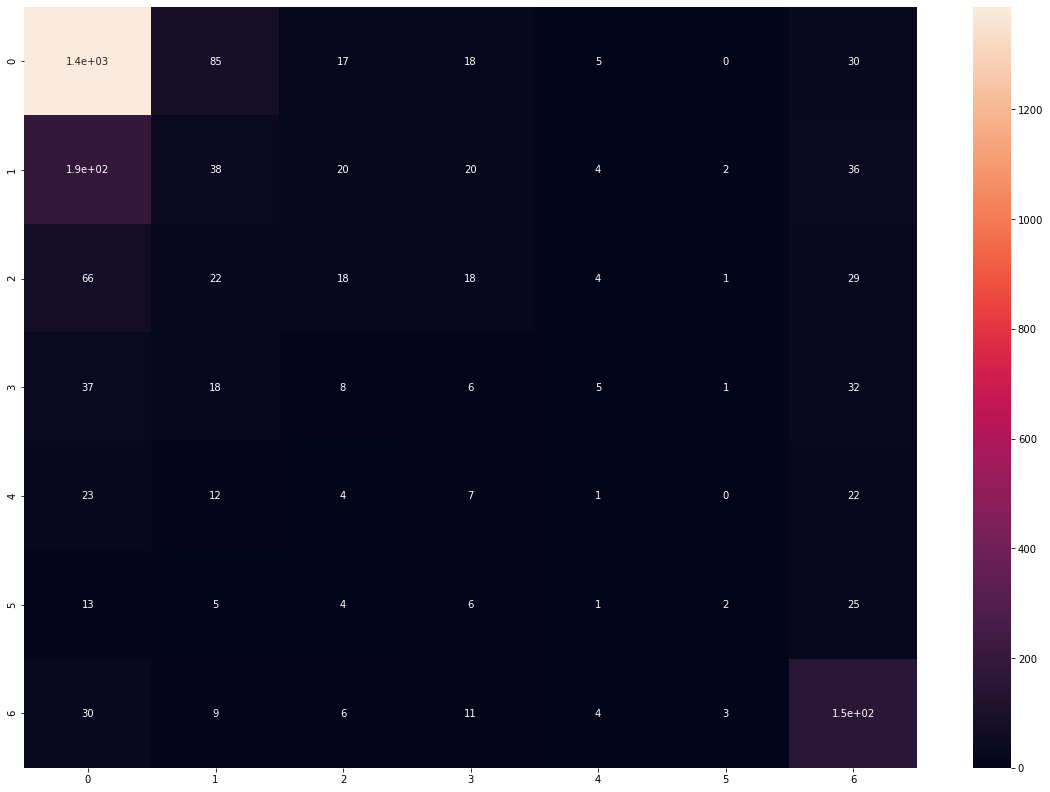

In [139]:
plotMatrix(matrix)